## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [89]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly_express as px
import plotly.graph_objects as go
import requests
import random as rd
from random import sample
import scipy.stats as sts
from scipy import special
import seaborn as sns
import time
from tqdm import tqdm
import vk


%matplotlib inline

In [90]:
vec = np.array([1, 2, 3, 4, 5])

In [91]:
def vandermonde_matrix(vec):
    n = vec.shape[0]
    stepeni = np.tile(np.arange(n), (n,1))
    vec_to_matrix = (np.tile(vec, (n,1))).swapaxes(0,1)
    
    return vec_to_matrix ** stepeni

In [92]:
vandermonde_matrix(vec)

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256],
       [  1,   5,  25, 125, 625]], dtype=int32)

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

* Задание 1

In [93]:
from scipy.stats import norm, expon, poisson, bernoulli

In [94]:
n = 20

In [95]:
vinni = expon.rvs(size=10 ** 4 * n, scale=1)
pyat = norm.rvs(size=10 ** 4 * n, loc=1, scale=1)
krolik = poisson.rvs(size=10 ** 4 * n, mu=1)
iaia = 2 * bernoulli.rvs(size=10 ** 4 * n, p=0.5)

In [96]:
a_1 = (np.vstack((vinni, pyat, krolik, iaia))).transpose()
a_1 = a_1.reshape(10 ** 4, n, 4)

In [97]:
a_1.shape

(10000, 20, 4)

`axis=1` соответствует результатам участников в каждом марафоне. То есть если суммировать по `axis=1`, то мы получим двумерную матрицу, где будет информация о суммарном количесве км в каждом марафоне для каждого участника. Аналогично по `axis=1` можно найти индексы максимальных значений (что и будет списком победителей) 

In [98]:
spisok_pobediteley_ind_1 = (a_1.sum(axis=1)).argmax(axis=1)

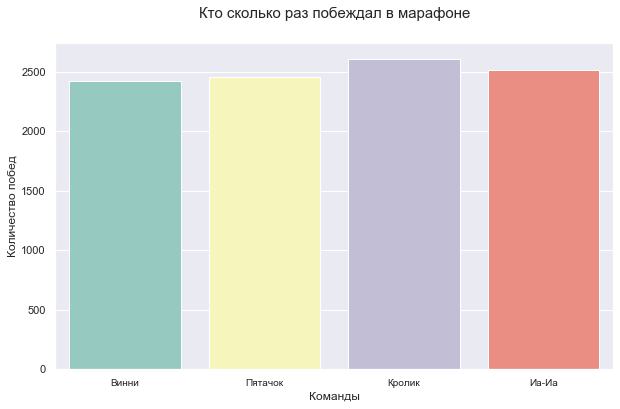

In [99]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(spisok_pobediteley_ind_1, palette='Set3')
sns.set(style="darkgrid")
labels = ['Винни', 'Пятачок', 'Кролик', 'Иа-Иа']
plt.title('Кто сколько раз побеждал в марафоне', fontsize=15, pad=25)
ax.set_xticklabels(labels, fontsize=10)
plt.xlabel('Команды')
plt.ylabel('Количество побед')

plt.show() 

* Задание 2

In [100]:
vinni_pyat = expon.rvs(size=10 ** 4 * n, scale=1) + norm.rvs(size=10 ** 4 * n, loc=1, scale=1)
krolik_iaia = poisson.rvs(size=10 ** 4 * n, mu=1) + 2 * bernoulli.rvs(size=10 ** 4 * n, p=0.5)

In [101]:
a_2 = (np.vstack((vinni_pyat, krolik_iaia))).transpose()
a_2 = a_2.reshape(10 ** 4, n, 2)

In [102]:
spisok_pobediteley_ind_2 = (a_2.sum(axis=1)).argmax(axis=1)

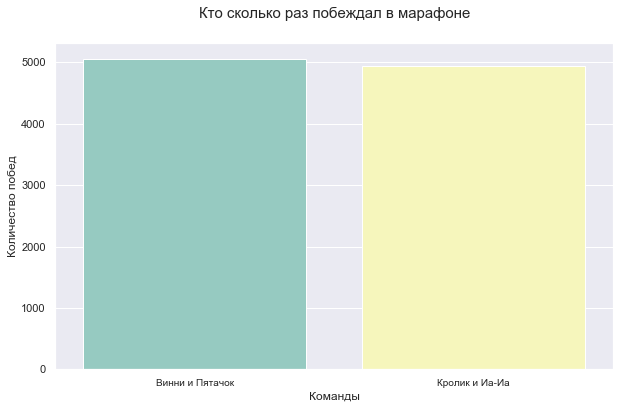

In [103]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(spisok_pobediteley_ind_2, palette='Set3')
sns.set(style="darkgrid")
labels = ['Винни и Пятачок', 'Кролик и Иа-Иа']
plt.title('Кто сколько раз побеждал в марафоне', fontsize=15, pad=25)
ax.set_xticklabels(labels, fontsize=10)
plt.xlabel('Команды')
plt.ylabel('Количество побед')

plt.show() 

#### Вывод:
Матожидание и дисперсия у всех участников совпадают. Величины независимые, значит, после объединения в команды (равные по числу участников), матожидание и дисперсия будет равна сумме одинаковых величин. Таким образом, все участники (и команды, равные по числу участников) имеют равные шансы выиграть в каждом марафоне и полученные равномерные результаты логичны (столбики в гистограммах примерно равны между собой) 

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [104]:
def parse_page(search, page):
    url = 'https://www.avito.ru/moskva?q={}&p={}'.format(search, page)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    info = tree.find_all('div', {'class' : 'description'})
    answer = []
    for item in info:
        try:
            answer.append({'title':item.find('h3', {'class':'snippet-title'}).text  ,
                           'href':'https://www.avito.ru' + item.a.get('href') ,
                           'price':' '.join(item.find('div', {'class':'snippet-price-row'}).text.split()),
                           'metro_station':item.find('span', {'class':'item-address-georeferences-item__content'}).text,
                           'metro_dist':item.find('span', {'class':'item-address-georeferences-item__after'}).text
                          })
        except:
            try:
                answer.append({'title':item.find('h3', {'class':'snippet-title'}).text  ,
                               'href':'https://www.avito.ru' + item.a.get('href') ,
                               'price':' '.join(item.find('div', {'class':'snippet-price-row'}).text.split()),
                               'metro_station':item.find('span', {'class':'item-address-georeferences-item__content'}).text,
                               'metro_dist':None
                              })
                
            except:
                answer.append({'title':item.find('h3', {'class':'snippet-title'}).text  ,
                               'href':'https://www.avito.ru' + item.a.get('href') ,
                               'price':' '.join(item.find('div', {'class':'snippet-price-row'}).text.split()),
                               'metro_station':None,
                               'metro_dist':None
                              })
    

    data = pd.DataFrame(answer)
    return data


In [105]:
parse_page('однокомнатная квартира', 3)

,title,href,price,metro_station,metro_dist
0,"1-к квартира, 35 м², 3/16 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,1 700 ₽ за сутки,Пражская,700 м
1,"1-к квартира, 15 м², 1/5 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,26 500 ₽ в месяц,Щелковская,600 м
2,"1-к квартира, 38 м², 12/23 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,6 000 000 ₽,Рассказовка,300 м
3,"1-к квартира, 52.4 м², 8/14 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,33 000 ₽ в месяц,Лесопарковая,500 м
4,"1-к квартира, 39 м², 6/9 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,1 500 ₽ за сутки,Медведково,300 м
5,"3-к квартира, 101.5 м², 1/1 эт.",https://www.avito.ru/moskva/kvartiry/3-k_kvart...,10 000 000 ₽,р-н Молжаниновский,None
6,"1-к квартира, 50 м², 10/18 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,22 000 000 ₽,Раменки,900 м
7,"1-к квартира, 32 м², 1/5 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,33 000 ₽ в месяц,Сходненская,1 км
8,"1-к квартира, 35 м², 3/16 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,1 700 ₽ за сутки,Пражская,700 м
9,"1-к квартира, 40 м², 2/5 эт.",https://www.avito.ru/moskva/kvartiry/1-k_kvart...,4 900 000 ₽,Аннино,"2,8 км"


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.


In [106]:
data = pd.read_csv('walmart.csv', delimiter=',')

In [107]:
data.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [108]:
data.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [109]:
data.shape

(418239, 16)

То есть 418239 наблюдений и 16 переменных

In [110]:
data.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [111]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')


2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.


In [112]:
data_propuski = data.apply(lambda col: str('{:.2f}'.format(data[col.isnull() == True].shape[0] / data.shape[0] * 100)) + ' %')

In [113]:
data_propuski

Store            0.00 %
Date             0.00 %
Dept             0.00 %
Weekly_Sales     0.00 %
IsHoliday        0.00 %
Type             0.00 %
Size             0.00 %
Temperature      0.00 %
Fuel_Price       0.00 %
MarkDown1       64.74 %
MarkDown2       74.14 %
MarkDown3       67.83 %
MarkDown4       68.36 %
MarkDown5       64.57 %
CPI              0.00 %
Unemployment     0.00 %
dtype: object

In [114]:
data.drop(data.columns[data.apply(lambda col: data[col.isnull() == True].shape[0] / data.shape[0] > 0.6)], axis=1, inplace=True)

In [115]:
data.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106



3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные?


In [116]:
print("Количество магазинов: ", data['Store'].nunique())

Количество магазинов:  45


In [117]:
print("Количество отделов: ", data['Dept'].nunique())

Количество отделов:  81


In [118]:
print("Даты с {} по {}, всего данные за {} дня.".format(min(data['Date']), 
                                            max(data['Date']), 
                                            data['Date'].nunique()))

Даты с 2010-02-05 00:00:00 по 2012-10-19 00:00:00, всего данные за 142 дня.


4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart

In [120]:
my_line = data[['Weekly_Sales','Date']].groupby('Date', as_index=False).sum()
px.line(my_line, 
        title='Динамика продаж Walmart',
        x='Date', 
        y='Weekly_Sales',
        labels={'Dates': 'Дата', 'Weekly_Sales': 'Объем продаж за неделю'}
        )


5. Найдите и нарисуйте матрицу корреляции для числовых показателей.


Из всех признаков в числовые я отобрала те, у которых `dtype == 'float64'`. Из оставшихся стоит добавить `Size` (у которого `dtype == 'int64'`, так как этот показатель может быть коррелирован, например, с объемом продаж. Еще `dtype == 'int64'` у номера магазина и номера отдела, но считать корреляцию с такими показателями бессмысленно. 

In [121]:
chisla_list = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

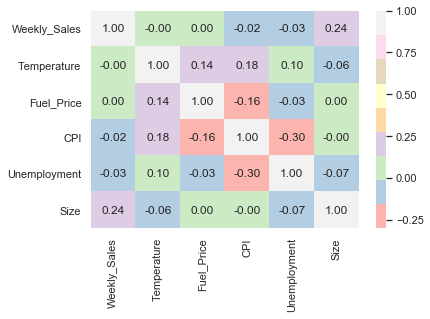

In [122]:
sns.heatmap(data[chisla_list].corr(), annot=True, fmt='.2f', cmap='Pastel1')

6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.

In [123]:
data_top = data.groupby('Store', as_index=False)['Weekly_Sales'].sum()
data_top = data_top.nlargest(5,'Weekly_Sales')

In [124]:
data_trend = data.groupby(['Date','Store'], as_index=False)['Weekly_Sales'].sum()

In [125]:
data_trend = data_trend.merge(data_top, on='Store')

In [126]:
data_trend.rename(columns={'Weekly_Sales_x':'Weekly_Sales',
                           'Date':'Dates'}, 
                    inplace=True)

In [127]:
px.line(data_trend, 
        title='Недельный объем продаж в пяти самых крупных магазинах Walmart',
        x='Dates', 
        y='Weekly_Sales',
        labels={'Dates': 'Дата', 'Weekly_Sales': 'Объем продаж за неделю'},
        color = 'Store'
        )

7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [128]:
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [129]:
data['Dept_new'] = data['Dept'].apply(lambda x: 'Dept #' + str(x))

In [130]:
data_top_depts = data[(data['Year'] == 2011) & (data['Type'] == 'A')].groupby('Dept_new', as_index=False)['Weekly_Sales'].sum()
data_top_depts = data_top_depts.nlargest(10,'Weekly_Sales')

In [131]:
data_top_depts.sort_values(by=['Weekly_Sales'], inplace=True)

In [132]:
data_top_depts.rename(columns={'Weekly_Sales':'Sales_2011'}, inplace=True)

In [133]:
fig = px.bar(data_top_depts,
             x='Sales_2011',
             y='Dept_new',
             labels={'Sales_2011': 'Объем продаж за 2011 год', 'Dept_new': '10 крупнейших отделов'},
             title=f'Топ-10 самых больших отделов Walmart по суммарным продажам за 2011 год',
             orientation='h'
            ) 
fig.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

1

In [134]:
'https://oauth.vk.com/authorize?client_id=7450817&display=page&redirect_uri=http://oauth.vk.com/blank.html&scope=all&response_type=token'

'https://oauth.vk.com/authorize?client_id=7450817&display=page&redirect_uri=http://oauth.vk.com/blank.html&scope=all&response_type=token'

In [135]:
def vk_api(token, group, kol_polzovateley):
    session = vk.Session(access_token=token)
    api = vk.API(session)
    data = pd.DataFrame([])
    del_list = ['first_name', 'last_name','is_closed', 'can_access_closed', 'deactivated']
    
    # выгружаю данные о необходимом количестве пользователей
    for offset in tqdm(range(0, kol_polzovateley, 1000)):
        inf_1000 = api.groups.getMembers(group_id=group, count=1000, v=5.103, fields='bdate', offset=offset)
        df = pd.DataFrame(inf_1000['items'])
        df.drop(del_list, axis=1, inplace=True)
        data = pd.concat([data, df], ignore_index=True)
        time.sleep(0.4)
    return data

In [136]:
token = '3683e1a09e68f2ac0ebcc6db51f0d08af8b3f4ef23ba92f9834275e771393f8425dda54cea6407090857e'

In [137]:
group = 'al_bertina'

In [138]:
kol_polzovateley = 30000

In [139]:
data = vk_api(token, group, kol_polzovateley)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.04it/s]


2

Удаляю все пустые строчки. Привожу даты рождения к одному формату:

In [140]:
data.dropna(inplace=True)

In [141]:
data['bdate'] = data['bdate'].apply(lambda x: '-'.join(x.split('.')[:2])+'-2020')

In [142]:
data['bdate'] = pd.to_datetime(data['bdate'], format = '%d-%m-%Y')

In [143]:
data['count'] = np.ones(data.shape[0])

3

In [144]:
months_to_words = {
     1: 'январь',
     2: 'февраль' ,
     3: 'март',
     4: 'апрель' ,
     5: 'май',
     6: 'июнь',
     7: 'июль',
     8: 'август',
     9: 'сентябрь',
     10: 'октябрь',
     11: 'ноябрь',
     12: 'декабрь'
}

In [145]:
data['months'] = pd.DatetimeIndex(data['bdate']).month

In [146]:
df_hist = data.groupby('months', as_index=False)['count'].sum()

In [147]:
df_hist.rename(columns={'count':'num'}, inplace=True)

In [148]:
df_hist['months_words'] = df_hist['months'].apply(lambda x: months_to_words[x])

In [149]:
fig = go.Figure(data=[
    go.Bar(name='Распределение дней рождений участников группы по месяцам',
           x=df_hist.months_words,
           y=df_hist.num)],
        layout=go.Layout(
        title=go.layout.Title(text="Распределение дней рождений подписчиков группы по месяцам")
))


fig.show()

Распределение рождаемости в течение года действительно примерно одинаковое 

4

* Без повторений внутри выборки:

In [150]:
my_set = set(data.index.tolist())

In [151]:
s = 0
for i in range(999):
    random_index = rd.sample(my_set, 50)
    if data.loc[random_index]['bdate'].nunique() != 50:
        s += 1
probability = '{:.2f}'.format(s / 999 * 100)

In [152]:
print("Вероятность совпадения дней рождений = {} %".format(probability))

Вероятность совпадения дней рождений = 97.10 %


* Если каждом шаге берем 50 людей и никого из них больше не включаем в дальнейшие выборки

In [153]:
s = 0
for i in range(200):
    random_index = rd.sample(my_set, 50)
    if data.loc[random_index]['bdate'].nunique() != 50:
        s += 1
    my_set = my_set - set(random_index)
probability = '{:.2f}'.format(s / 200 * 100)

In [154]:
print("Вероятность совпадения дней рождений = {} %".format(probability))

Вероятность совпадения дней рождений = 96.00 %
